# Tips and Tricks with Jupyter Notebooks

about this notebook...
QR code: I am available here...

index for this

NB: Created from perspective of working with Linux shell. 


## Part 1: Setting up Virtual Environments for Python kernel

This convers configuring a virtual environment to work with specific Python version and use this within Jupyter Notebooks.

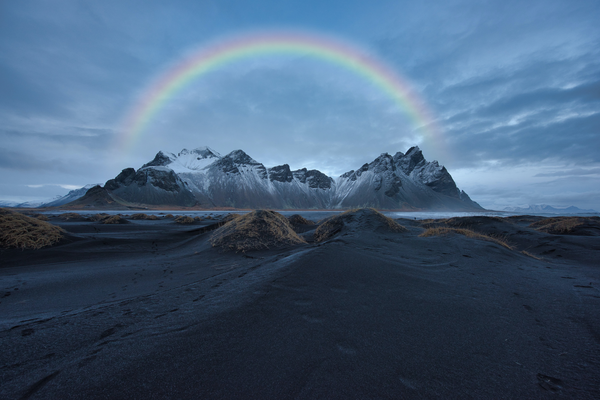

In [1]:
from PIL import Image               # to load images
from IPython.display import display # to display images

basewidth = 600
pil_img = Image.open('assets/rainbow_mountain.jpg')
wpercent = (basewidth/float(pil_img.size[0]))
hsize = int((float(pil_img.size[1])*float(wpercent)))
pil_img = pil_img.resize((basewidth,hsize), Image.ANTIALIAS)

display(pil_img)

### 1) Use conda to install specific python version:

```
conda create --name python3_8_env python=3.8

```

- For `name`, specify the name for your virtual environment

### 2) List virtual environments installed with conda:

```
conda info --envs
```
Example output:
```
# conda environments:
#
base                  *  /home/user/anaconda3
mydatasci                /home/user/anaconda3/envs/mydatasci
python3_8_env            /home/user/anaconda3/envs/python3_8_env

```

### 3) Activate the environment:

```
conda activate python3_8_env
```

### 4) Check for the basic requirements in the venv:

We list installed libaries through using 'conda list', as opposed to 'pip freeze':

```
(python3_8_env) user@yourmachine: conda list
```

Here are the minimum key libraries I would expect to see with any venv configured for python:

```
# packages in environment at /home/sian/anaconda3/envs/python3_8_env:
#
# Name                    Version                   Build  Channel
pip                       20.2.3                   py38_0  
python                    3.8.5                h7579374_1   <- We can check the python version here
setuptools                50.3.0           py38hb0f4dca_1  
wheel                     0.35.1                     py_0  

```

### 5) Install ipykernel library required for setting up the Python kernel:

Generally, when installing packages for Jupyter Notebooks, stick to using conda install instead of pip. This means we can work with Python libraries best suited for the Anaconda distribution.

```
(python3_8_env) user@yourmachine: conda install ipykernel
```

This will prompt for installing further libraries including ipython, jupyter_client and jupyter_core

### 6) Install the kernel using ipython:

When you specify the name for the kernel, suggest naming this the same as the activated venv you are using:

```
(python3_8_env) user@yourmachine: ipython kernel install --user --name=python3_8_env
```

### 7) Refresh the url for your notebook project and select the newly set up kernel:

It should be possible to select the python kernel under the 'Change kernel' option, in the 'Kernel' dropdown menu within your Jupyter notebook. Typically, 'Python 3' will be the default kernel.

![](assets/kernel_selection.png)

When you not longer need to work with your venv in the terminal, you can simple deactivate it:

```
(python3_8_env) user@yourmachine: conda deactivate
```

## Part 2: Package Management

### View descriptions for installed Modules

Once the kernel has been configured for your venv, you can see what modules are installed for this via the Anaconda Navigator menu under 'Environments'

![](assets/anaconda_navigator_1.png)


Beyond `conda list` to show installed modules, it's nice to see a basic description for these

### Working with Tools for installing Modules

Should you use different tools for installing modules, be prepared for potential issues with interdepencies.

There are 3 main tools:

- conda: Provides the advantage of installing python packages and interpreter directly, as well as from other languages.
- [conda-forge](https://conda-forge.org/) with conda: community-led initiate for providing builds for the conda package manager. 
- pypi: refers to the where pip may typically be used for installing packages from the Python Package Index

[Further reading on understanding conda and pip](https://www.anaconda.com/blog/understanding-conda-and-pip)


### Tackling interdependencies

Consider the following example with installing the common data visualization libraries **matplotlib** and then **seaborn**. 

In this example, the venv has been set up with **python 3.8.5**

```
(test_env) user@yourmachine: conda install matplotlib <- Installs  v3.3.2

(test_env) user@yourmachine: conda install -c conda-forge matplotlib <- Installs v3.3.3 over the top

(test_env) user@yourmachine: pip install matplotlib <- Requirements already fulfilled
```

Now, running `conda list`, we can see **channels** through which example libraries have been installed:

```

# Name                    Version          Build              Channel
matplotlib                3.3.3            py38h578d9bd_0     conda-forge
pyqt5-sip                 4.19.18          pypi_0             pypi
pyqtchart                 5.12             pypi_0             pypi
pyqtwebengine             5.12.1           pypi_0             pypi
python                    3.8.6            h852b56e_0_cpython conda-forge
```
- conda-forge shows potential of working with the most up-to-date version of packages for use with Anaconda
- However, in this case, it has led to the surprise of upgrading the python version!!
- If you had already set up your ipykernel beforehand, this might upset your kernel in Jupyter


**Now** let's see what happens when we try to install seaborn...

```
(test_env) user@yourmachine: conda install seaborn <- Triggers conflicts

(test_env) user@yourmachine: conda install -c conda-forge seaborn -> Installs v0.11.0
```

If you intend to use conda-forge, check the latest version number for a library corresponds with that on its official website.

Keep in mind, not all libaries will work with the latest version of Python!

Thus using conda, without conda-forge may feel more safe.


### Outputting Requirements

Modules can be saved to a requirements.txt file:

```
(test_env) conda list -e > requirements.txt

```

Interesting conversation [here](https://stackoverflow.com/questions/50777849/from-conda-create-requirements-txt-for-pip3).


### Installing Requirements

Once you've set up your venv for a new project, requirements can be installed. 

Do check the python version for the venv and within the requirements.txt are the same to avoid interdependcy conflicts!

``` 
while read requirement; do conda install --yes $requirement; done < requirements.txt
```

[This method](https://www.technologyscout.net/2017/11/how-to-install-dependencies-from-a-requirements-txt-file-with-conda/) helps ensure all dependencies are installed.

## Part 3: Publishing your own resources

- When you are preparing resource, consider a solution where you can hide all the coded inputs, but you keep the outputs you wish to show

- Any code you want to show can be written in markdown and encapsulated with \`\`\`

- In the last cell paste the following within a Code cell at the base of the notebook:

```
%%html
<style>
div.input {
    display:none;
}
</style>
```

Here's a sample report before and after all cells are run:

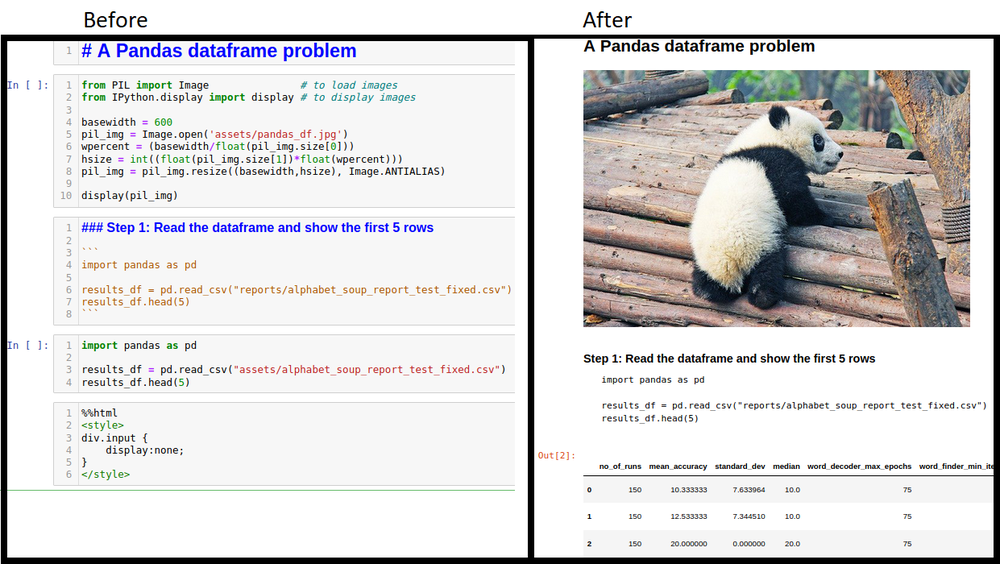

In [2]:
from PIL import Image               # to load images
from IPython.display import display # to display images

basewidth = 1000
pil_img = Image.open('assets/sample_report_before_and_after.png')
wpercent = (basewidth/float(pil_img.size[0]))
hsize = int((float(pil_img.size[1])*float(wpercent)))
pil_img = pil_img.resize((basewidth,hsize), Image.ANTIALIAS)

display(pil_img)

In order to view all cells again, the last hidden html cell will need to be clicked on and switched back to markdown. Otherwise, you can restart the kernel and clear outputs.

When you are happy with the report, you can download it as html:

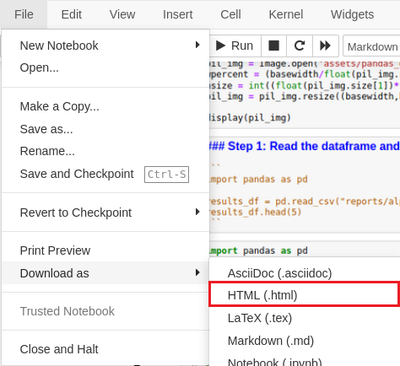

In [3]:
basewidth = 400
pil_img = Image.open('assets/download_as_html.png')
wpercent = (basewidth/float(pil_img.size[0]))
hsize = int((float(pil_img.size[1])*float(wpercent)))
pil_img = pil_img.resize((basewidth,hsize), Image.ANTIALIAS)

display(pil_img)

### Final considerations for deploying html pages

- It's true Jupyter notebooks can be previewed in GitHub but they can appear messy if you need to hide code
- In this solution, you can hide code and push html files to GitHub as part of an easy free deployment.

- Simply add 'https://htmlpreview.github.io/?' as a precursor to the link for your html report:

Example: 

https://htmlpreview.github.io/?https://github.com/Kremzeeq/alphabet_soup/blob/master/alphabet_soup_pandas_problem.html


If your report has multiple pages, use these as hyperlinks to help tell your story!

## Creating Interactive Dashboards

- Using ipywidgets
- Not as easy using PowerBI/Tableau
- Need solution where you can access dashboards as part of an API
- Really you would be looking to use a cloud notebook solution like Databricks - TP plugin with AWS and Azure


# A Pandas dataframe problem

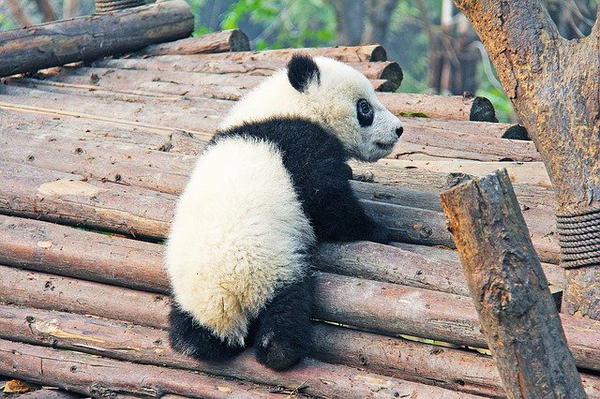

In [4]:
from PIL import Image               # to load images
from IPython.display import display # to display images

basewidth = 600
pil_img = Image.open('assets/pandas_df.jpg')
wpercent = (basewidth/float(pil_img.size[0]))
hsize = int((float(pil_img.size[1])*float(wpercent)))
pil_img = pil_img.resize((basewidth,hsize), Image.ANTIALIAS)

display(pil_img)

### Step 1: Read the dataframe and show the first 5 rows

```
import pandas as pd

results_df = pd.read_csv("reports/alphabet_soup_report_test_fixed.csv")
results_df.head(5)
```

In [5]:
import pandas as pd

results_df = pd.read_csv("assets/alphabet_soup_report_test_fixed.csv")
results_df.head(5)

,no_of_runs,mean_accuracy,standard_dev,median,word_decoder_max_epochs,word_finder_min_iters_per_epoch,word_finder_min_potential_words,word_finder_max_epochs,word_finder_max_attempts,no_of_random_letters,time_taken_in_seconds,word_finder_name,best_accuracy,best_decrypted_word_dict
0,150,10.333333,7.633964,10.0,75,0,0,0,0,10,106.784413,PyspellcheckerWordFinder,30.0,"{""0ra0e0"": ""braver"", ""0ebr0"": ""zebra"", ""0o0ey""..."
1,150,12.533333,7.344510,10.0,75,0,0,0,0,10,81.944514,PyspellcheckerWordFinder,30.0,"{'0ra0e0': 'tracer', '0e00est': 'bequest', '0e..."
2,150,20.000000,0.000000,20.0,75,0,0,0,0,10,129.034632,PyspellcheckerWordFinder,20.0,"{'s00r0': 'sours', '0ala00': 'galaxy', '0o0ey'..."


%%html
<style>
div.input {
    display:none;
}
</style>